In [1]:
import pandas as pd

# Load the raw churn data
df = pd.read_csv("../data/raw/churn_data.csv")

# Quick peek
df.head()


,customer_id,join_date,age,gender,tenure_days,num_logins,avg_session_min,monthly_spend,churn
0,CUST0001,2023-04-13,45,Female,790,22,56.0,80.13,0
1,CUST0002,2024-03-11,53,Female,457,33,6.1,151.89,0
2,CUST0003,2023-09-28,43,Non-binary,622,41,31.2,92.81,0
3,CUST0004,2023-04-17,25,Female,786,31,42.8,32.30,0
4,CUST0005,2023-03-13,67,Male,821,37,44.7,161.08,0


In [3]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      500 non-null    object 
 1   join_date        500 non-null    object 
 2   age              500 non-null    int64  
 3   gender           500 non-null    object 
 4   tenure_days      500 non-null    int64  
 5   num_logins       500 non-null    int64  
 6   avg_session_min  500 non-null    float64
 7   monthly_spend    500 non-null    float64
 8   churn            500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


,age,tenure_days,num_logins,avg_session_min,monthly_spend,churn
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,43.272000,631.912000,30.012000,32.608600,110.158640,0.072000
std,15.244369,153.326104,5.557484,16.205741,51.518297,0.258747
min,18.000000,376.000000,12.000000,5.000000,20.360000,0.000000
25%,30.000000,496.750000,27.000000,19.300000,64.792500,0.000000
50%,43.000000,640.000000,30.000000,32.500000,113.415000,0.000000
75%,56.000000,763.250000,34.000000,46.950000,152.760000,0.000000
max,69.000000,892.000000,46.000000,59.900000,199.800000,1.000000


<Axes: >

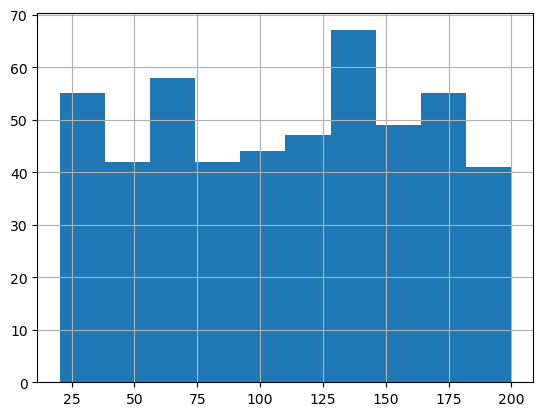

In [5]:
df["monthly_spend"].hist()


In [7]:
df["churn"].value_counts(normalize=True)


churn
0    0.928
1    0.072
Name: proportion, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      500 non-null    object 
 1   join_date        500 non-null    object 
 2   age              500 non-null    int64  
 3   gender           500 non-null    object 
 4   tenure_days      500 non-null    int64  
 5   num_logins       500 non-null    int64  
 6   avg_session_min  500 non-null    float64
 7   monthly_spend    500 non-null    float64
 8   churn            500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,500.0,43.27200,15.244369,18.00,30.0000,43.000,56.00,69.0
tenure_days,500.0,631.91200,153.326104,376.00,496.7500,640.000,763.25,892.0
num_logins,500.0,30.01200,5.557484,12.00,27.0000,30.000,34.00,46.0
avg_session_min,500.0,32.60860,16.205741,5.00,19.3000,32.500,46.95,59.9
monthly_spend,500.0,110.15864,51.518297,20.36,64.7925,113.415,152.76,199.8
churn,500.0,0.07200,0.258747,0.00,0.0000,0.000,0.00,1.0


In [13]:
# churn class‐balance
counts = df["churn"].value_counts()
pct = df["churn"].value_counts(normalize=True).mul(100).round(1)
print(pd.concat([counts, pct], axis=1).rename(columns={0:"Count",1:"Pct (%)"}))


       count  proportion
churn                   
0        464        92.8
1         36         7.2


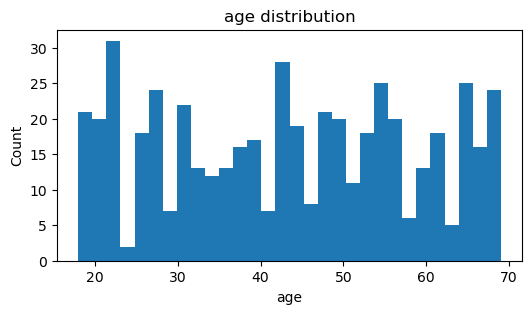

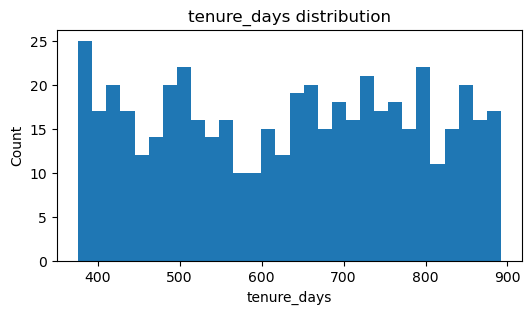

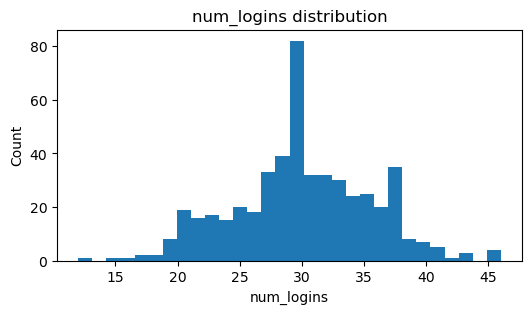

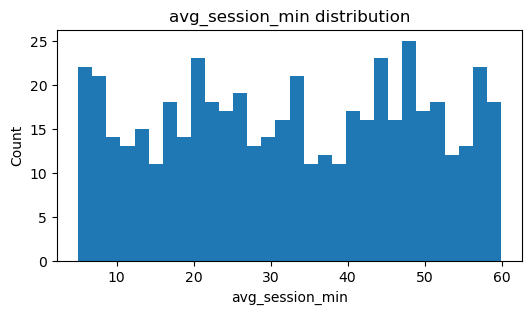

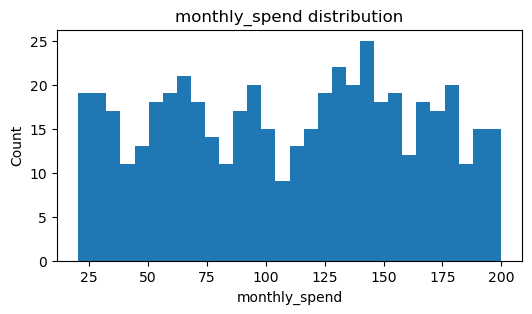

In [15]:
import matplotlib.pyplot as plt

# numeric columns to explore
cols = ["age","tenure_days","num_logins","avg_session_min","monthly_spend"]

for col in cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=30)
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


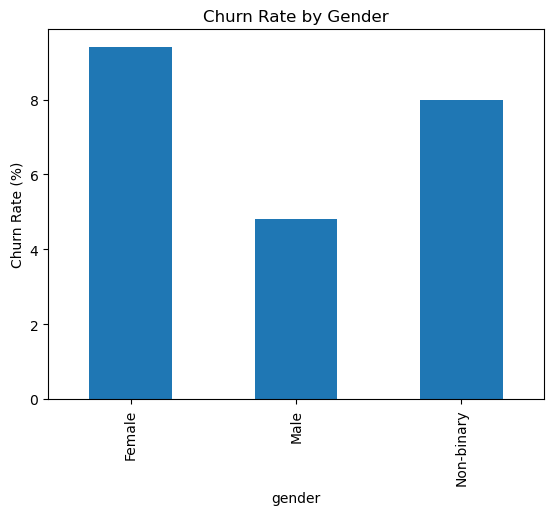

In [17]:
# churn rate by gender
churn_by_gender = df.groupby("gender")["churn"].mean().mul(100).round(1)
churn_by_gender.plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")
plt.show()


/var/folders/ck/8xhw9xgd6pd_2d5tm1g9_jhw0000gn/T/ipykernel_45511/216435077.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_bin")["churn"].mean().mul(100).plot(kind="bar")


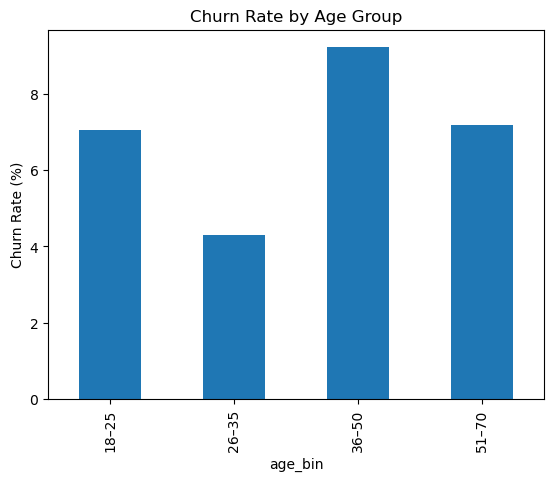

In [19]:
# create age buckets
df["age_bin"] = pd.cut(df["age"], bins=[17,25,35,50,70], labels=["18–25","26–35","36–50","51–70"])
df.groupby("age_bin")["churn"].mean().mul(100).plot(kind="bar")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Age Group")
plt.show()


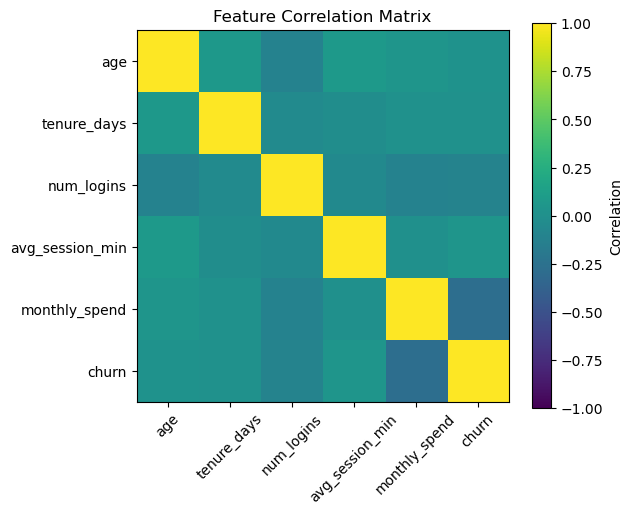

In [21]:
corr = df[cols + ["churn"]].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()


In [23]:
df.isna().sum()

customer_id        0
join_date          0
age                0
gender             0
tenure_days        0
num_logins         0
avg_session_min    0
monthly_spend      0
churn              0
age_bin            0
dtype: int64

In [25]:
df_clean = df.copy()

In [27]:
num_cols = ["tenure_days", "num_logins", "avg_session_min", "monthly_spend"]
for col in num_cols:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
print("Original rows:", len(df), "Cleaned rows:", len(df_clean))
    



Original rows: 500 Cleaned rows: 493


In [29]:
import numpy as np

# a) Tenure in months
df_clean["tenure_months"] = (df_clean["tenure_days"] / 30).round(1)

# b) Simulate a ‘last_login’ date and compute recency
df_clean["last_login"] = pd.to_datetime(df_clean["join_date"]) + \
    pd.to_timedelta(np.random.randint(0, df_clean["tenure_days"], size=len(df_clean)), unit="D")
df_clean["recency_days"] = (pd.Timestamp.now().normalize() - df_clean["last_login"]).dt.days

# c) Total spend (monetary)
df_clean["monetary_total"] = (df_clean["monthly_spend"] * df_clean["tenure_months"]).round(2)


In [49]:
# Work off your cleaned DataFrame
df_feat = df_clean.copy()

# a) Age buckets 
df_feat["age_bin"] = pd.cut(
    df_feat["age"],
    bins=[17, 25, 35, 50, 70],
    labels=["18–25", "26–35", "36–50", "51–70"]
)

# b) One-hot encode gender & age_bin
df_feat = pd.get_dummies(
    df_feat,
    columns=["gender", "age_bin"],
    drop_first=True  # avoids redundancy
)

# Inspect new columns
df_feat.columns.tolist()


['customer_id',
 'join_date',
 'age',
 'tenure_days',
 'num_logins',
 'avg_session_min',
 'monthly_spend',
 'churn',
 'tenure_months',
 'last_login',
 'recency_days',
 'monetary_total',
 'gender_Male',
 'gender_Non-binary',
 'age_bin_26–35',
 'age_bin_36–50',
 'age_bin_51–70']

In [33]:
from sklearn.preprocessing import StandardScaler

# 2a) List out your feature columns
numeric_feats = ["tenure_months", "recency_days", "num_logins", "avg_session_min", "monetary_total"]
cat_feats = [c for c in df_feat.columns if c.startswith("gender_") or c.startswith("age_bin_")]

feature_cols = numeric_feats + cat_feats

# 2b) Extract X & y
X = df_feat[feature_cols]
y = df_feat["churn"]

# 2c) Scale only the numeric ones
scaler = StandardScaler()
X[numeric_feats] = scaler.fit_transform(X[numeric_feats])

# Quick check
X.head()


/var/folders/ck/8xhw9xgd6pd_2d5tm1g9_jhw0000gn/T/ipykernel_45511/3748061223.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_feats] = scaler.fit_transform(X[numeric_feats])


,tenure_months,recency_days,num_logins,avg_session_min,monetary_total,gender_Male,gender_Non-binary,age_bin_26–35,age_bin_36–50,age_bin_51–70
0,1.021765,0.314945,-1.512528,1.458410,-0.177064,False,False,False,True,False
1,-1.152271,-1.072245,0.571425,-1.637289,-0.018650,False,False,False,False,True
2,-0.075046,-1.394729,2.087028,-0.080134,-0.323628,False,True,False,True,False
3,1.002179,0.130669,0.192525,0.639508,-1.169497,False,False,False,False,False
4,1.237210,-1.287234,1.329227,0.757380,1.637708,True,False,False,False,True


In [39]:
import os


os.makedirs("data/features", exist_ok=True)

# Now you can safely write out
X_train.to_csv("data/features/X_train.csv", index=False)
X_test .to_csv("data/features/X_test.csv",  index=False)
y_train.to_csv("data/features/y_train.csv", index=False)
y_test .to_csv("data/features/y_test.csv",  index=False)


In [41]:
import os
os.makedirs("models", exist_ok=True)


In [43]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Predict probabilities & classes
y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba  = model.predict_proba(X_test) [:,1]
y_train_pred  = model.predict(X_train)
y_test_pred   = model.predict(X_test)

# AUC
print("Train  ROC AUC:", roc_auc_score(y_train, y_train_proba).round(3))
print("Test   ROC AUC:", roc_auc_score(y_test,  y_test_proba).round(3))

# Classification report
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Confusion matrix
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Train  ROC AUC: 0.833
Test   ROC AUC: 0.814

Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        92
           1       0.00      0.00      0.00         7

    accuracy                           0.93        99
   macro avg       0.46      0.50      0.48        99
weighted avg       0.86      0.93      0.90        99

Test Confusion Matrix:
 [[92  0]
 [ 7  0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
import joblib

# Save logistic model
joblib.dump(model, "models/churn_model.pkl")

joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [61]:
import os

# 1. Make sure the raw‐data folder exists
os.makedirs("data/raw", exist_ok=True)

# 2. Copy the generated CSV from /mnt/data into data/raw
!cp /mnt/data/churn_data.csv data/raw/churn_data.csv

# 3. Verify it’s there
!ls data/raw


cp: /mnt/data/churn_data.csv: No such file or directory


In [63]:
# List what’s actually in data/raw
!ls data/raw


In [65]:
import pandas as pd

df = pd.read_csv("data/raw/churn_data.csv", parse_dates=["join_date"])
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/churn_data.csv'

In [67]:
import os, pandas as pd, numpy as np

# 1. Recreate the raw‐data folder
os.makedirs("data/raw", exist_ok=True)

# 2. Generate a synthetic churn dataset
np.random.seed(42)
n = 500
ids    = [f"CUST{str(i).zfill(4)}" for i in range(1, n+1)]
dates  = pd.date_range("2023-01-01", "2024-05-31")
joins  = np.random.choice(dates, n)
ages   = np.random.randint(18, 70, n)
gens   = np.random.choice(["Male","Female","Non-binary"], n, p=[.45,.45,.1])
tenure = (pd.Timestamp.now().normalize() - joins).days
logins = np.random.poisson(30, n)
sess   = np.round(np.random.uniform(5,60, n),1)
spend  = np.round(np.random.uniform(20,200, n),2)
score  = -0.01*spend - 0.02*logins + np.random.normal(0,1,n)
prob   = 1/(1+np.exp(-score))
churn  = (prob > 0.5).astype(int)

df = pd.DataFrame({
    "customer_id":     ids,
    "join_date":       joins,
    "age":             ages,
    "gender":          gens,
    "tenure_days":     tenure,
    "num_logins":      logins,
    "avg_session_min": sess,
    "monthly_spend":   spend,
    "churn":           churn
})

# 3. Save it into your project
df.to_csv("data/raw/churn_data.csv", index=False)
print("✅ Generated and saved", len(df), "rows to data/raw/churn_data.csv")

# 4. Quick check
!ls data/raw


UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('O') and dtype('<M8[ns]')

In [69]:
import os, pandas as pd, numpy as np

# 1. Ensure the raw‐data folder exists
os.makedirs("data/raw", exist_ok=True)

# 2. Seed & parameters
np.random.seed(42)
n = 500

# 3. IDs & join dates
customer_ids = [f"CUST{str(i).zfill(4)}" for i in range(1, n+1)]
date_index   = pd.date_range("2023-01-01", "2024-05-31")
join_dates   = np.random.choice(date_index, n)

# 4. Compute tenure_days properly via a pandas Series
join_series  = pd.to_datetime(pd.Series(join_dates))
today        = pd.Timestamp.now().normalize()
tenure_days  = (today - join_series).dt.days

# 5. Other features
ages        = np.random.randint(18, 70, n)
genders     = np.random.choice(["Male","Female","Non-binary"], n, p=[.45,.45,.1])
num_logins  = np.random.poisson(30, n)
avg_session = np.round(np.random.uniform(5, 60, n), 1)
monthly_spend = np.round(np.random.uniform(20, 200, n), 2)

# 6. Simulate churn
score = -0.01 * monthly_spend - 0.02 * num_logins + np.random.normal(0, 1, n)
prob  = 1 / (1 + np.exp(-score))
churn = (prob > 0.5).astype(int)

# 7. Build DataFrame
df = pd.DataFrame({
    "customer_id":      customer_ids,
    "join_date":        join_series,
    "age":              ages,
    "gender":           genders,
    "tenure_days":      tenure_days,
    "num_logins":       num_logins,
    "avg_session_min":  avg_session,
    "monthly_spend":    monthly_spend,
    "churn":            churn
})

# 8. Save to CSV
df.to_csv("data/raw/churn_data.csv", index=False)
print(f"✅ Generated and saved {len(df)} rows to data/raw/churn_data.csv")

# 9. Verify
print(os.listdir("data/raw"))


✅ Generated and saved 500 rows to data/raw/churn_data.csv
['churn_data.csv']


In [71]:
df = pd.read_csv("data/raw/churn_data.csv", parse_dates=["join_date"])
df.head()


,customer_id,join_date,age,gender,tenure_days,num_logins,avg_session_min,monthly_spend,churn
0,CUST0001,2023-04-13,45,Female,789,22,56.0,80.13,0
1,CUST0002,2024-03-11,53,Female,456,33,6.1,151.89,0
2,CUST0003,2023-09-28,43,Non-binary,621,41,31.2,92.81,0
3,CUST0004,2023-04-17,25,Female,785,31,42.8,32.30,0
4,CUST0005,2023-03-13,67,Male,820,37,44.7,161.08,0


In [73]:
import os, pandas as pd, numpy as np, joblib

# 1) Ensure folders exist
os.makedirs("data/predictions", exist_ok=True)

# 2) Load raw data & trained artifacts
df = pd.read_csv("data/raw/churn_data.csv", parse_dates=["join_date"])
model  = joblib.load("models/churn_model.pkl")
scaler = joblib.load("models/scaler.pkl")

# 3) Re-create features
df["tenure_months"] = (df["tenure_days"] / 30).round(1)
df["last_login"] = (
    pd.to_datetime(df["join_date"])
    + pd.to_timedelta(
        np.random.randint(0, df["tenure_days"], size=len(df)),
        unit="D"
    )
)
df["recency_days"]   = (pd.Timestamp.now().normalize() - df["last_login"]).dt.days
df["monetary_total"] = (df["monthly_spend"] * df["tenure_months"]).round(2)
df["cohort"]         = df["join_date"].dt.to_period("M").astype(str)

# 4) One-hot encode & align to training features
df_feat = pd.get_dummies(df, columns=["gender","age_bin"] if "age_bin" in df else ["gender"], drop_first=True)
for feat in model.feature_names_in_:
    if feat not in df_feat.columns:
        df_feat[feat] = 0
X_full = df_feat[model.feature_names_in_]

# 5) Scale numeric features
num_feats = ["tenure_months","recency_days","num_logins","avg_session_min","monetary_total"]
X_full[num_feats] = scaler.transform(X_full[num_feats])

# 6) Predict churn probability & flag anomalies
df["pred_churn_proba"] = model.predict_proba(X_full)[:,1]
stats = df.groupby("cohort")["pred_churn_proba"].agg(["mean","std"]).rename(
    columns={"mean":"cohort_mean","std":"cohort_std"}
)
df = df.merge(stats, on="cohort", how="left")
df["anomaly_flag"] = df["pred_churn_proba"] > (df["cohort_mean"] + 2*df["cohort_std"])

# 7) Export for Power BI
out = df[["customer_id","join_date","pred_churn_proba","anomaly_flag","cohort"]]
out.to_csv("data/predictions/predictions.csv", index=False)

print(f"✅ Saved {len(out)} rows to data/predictions/predictions.csv")


✅ Saved 500 rows to data/predictions/predictions.csv


/var/folders/ck/8xhw9xgd6pd_2d5tm1g9_jhw0000gn/T/ipykernel_45511/2586108369.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_full[num_feats] = scaler.transform(X_full[num_feats])


In [75]:
!ls data/predictions


predictions.csv
